# Importing libraries and data

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn as sk
import matplotlib.pyplot as plt

## Loading and visualization of the dataset

In [ ]:
#import the csv file as a dataset 
dataframe=pd.read_csv("train.csv", sep=',')

#printing basic information about the dataset
print('****** DATASET DIMENSIONS ****** \n', dataframe.shape, '\n')
print('****** DATSET INFO ******')
print(dataframe.info(verbose=True), '\n')

display(dataframe.head())

****** DATASET DIMENSIONS ****** 
 (13741, 12) 

****** DATSET INFO ******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13741 entries, 0 to 13740
Data columns (total 12 columns):
age                 13741 non-null int64
speciality_years    13741 non-null int64
speciality          13741 non-null object
wing                13741 non-null object
entry_level         13741 non-null object
occupation          13741 non-null object
intervention        13741 non-null object
ethnicity           13741 non-null object
 sex                13741 non-null object
hours               13741 non-null int64
country             13741 non-null object
target              13741 non-null int64
dtypes: int64(4), object(8)
memory usage: 1.3+ MB
None 



,age,speciality_years,speciality,wing,entry_level,occupation,intervention,ethnicity,sex,hours,country,target
0,34,2,Cardiology,W,minor-medium,ER doctors,Therapeutic,White,Male,44,Mexico,0
1,59,12,Emergency,W,minor-medium,Therapist,Therapeutic,White,Male,55,United-States,1
2,64,10,Psychiatry,S,medium-high,Patient,Other,Black,Male,44,United-States,0
3,61,12,Emergency,W,minor-medium,Patient,Therapeutic,Black,Male,55,United-States,1
4,33,10,Psychiatry,W,minor-medium,Surgeons,Therapeutic,White,Male,77,United-States,1


<Figure size 432x288 with 0 Axes>

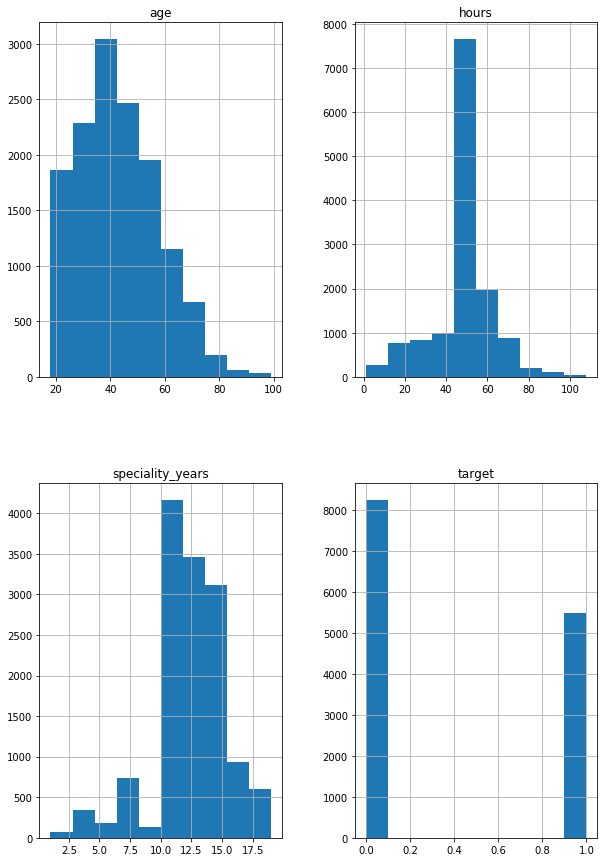

<Figure size 432x288 with 0 Axes>

In [ ]:
dataframe.hist(figsize=(10,15))
plt.figure()

## Graphical Analysis

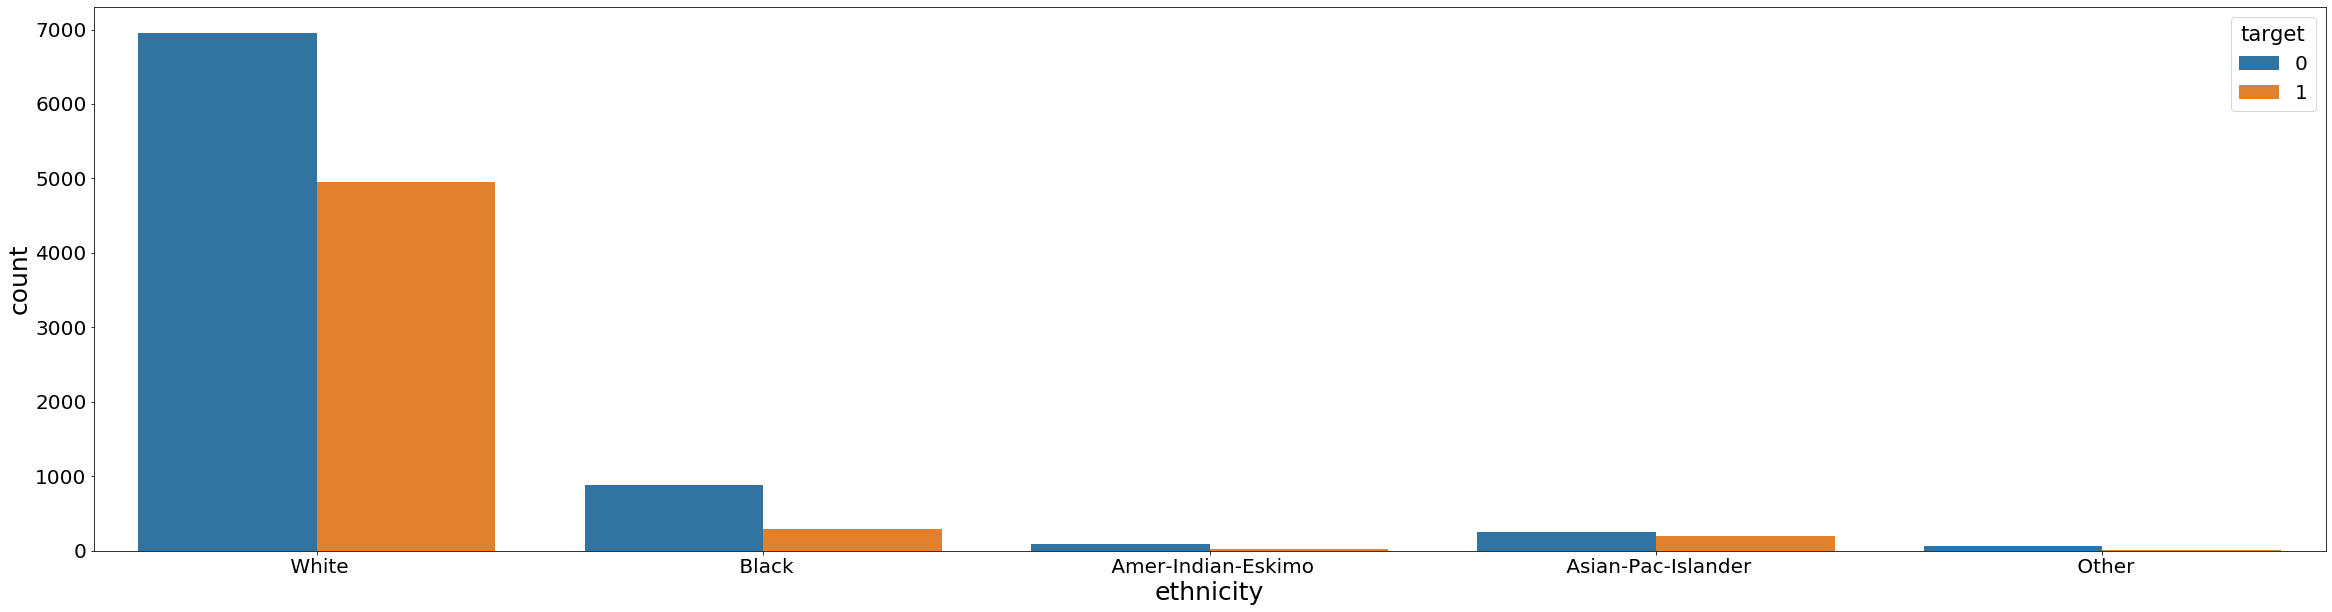

In [ ]:
plt.figure(figsize=(40,10))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=25)
sb.countplot('ethnicity' ,hue='target',data=dataframe)
plt.show()

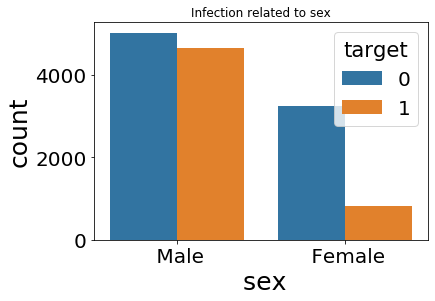

In [ ]:
sb.countplot(' sex',hue='target',data=dataframe)
plt.title('Infection related to sex')
plt.show()

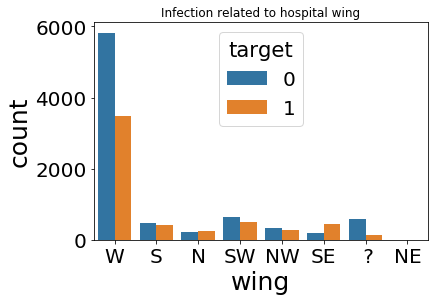

In [ ]:
sb.countplot('wing',hue='target',data=dataframe)
plt.title('Infection related to hospital wing')
plt.show()

## Detection of missing values

In [ ]:
#looking for NaN values
tot_nan=dataframe.isna().values.sum()
print('Total number of NaN elements: ', tot_nan)
dataframe.isna().sum()

Total number of NaN elements:  0


age                 0
speciality_years    0
speciality          0
wing                0
entry_level         0
occupation          0
intervention        0
ethnicity           0
 sex                0
hours               0
country             0
target              0
dtype: int64

In [ ]:
#looking for ' ?' values in the datase
print('Is there any missing data [T/F]:\n', (dataframe[:]==' ?').any())

Is there any missing data [T/F]:
 age                 False
speciality_years    False
speciality          False
wing                 True
entry_level         False
occupation           True
intervention        False
ethnicity           False
 sex                False
hours               False
country              True
target              False
dtype: bool


C:\Users\Martina\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [ ]:
#substitute ' ?' values with NaN
missing_values = [" ?"]
dataframe = pd.read_csv("train.csv", na_values = missing_values)

In [ ]:
#now missing values appear as NaN
tot_nan=dataframe.isna().values.sum()
print('Total number of NaN elements: ', tot_nan)
dataframe.isna().sum()

#% of NaN values 
print('NaN values constitute ', (tot_nan/(dataframe.shape[0]*dataframe.shape[1])*100), '% of data')

Total number of NaN elements:  1661
NaN values constitute  1.0073260073260073 % of data


In [ ]:
#dropping NaN values from the dataset
dataframe = dataframe.dropna() #drop all the rows with NaN elements
dataframe = dataframe.reset_index(drop=True) #reset the dataframe row indices

In [ ]:
#check if all NaN values have been dropped
print('Total number of NaN: ', dataframe.isnull().values.sum())
dataframe.shape

Total number of NaN:  0


(12800, 12)

## Inspecting correlation between columns

In [ ]:
spec=dataframe['speciality'].unique()
spec_year=dataframe['speciality_years'].unique()
print('Unique specialities: ', spec,'\n\nUnique speciality years : ', spec_year)

Unique specialities:  ['Cardiology' 'Emergency' 'Psychiatry' 'Opthalmology' 'Gastroenterology'
 'Anaesthesiology' 'Orthopedic' 'Pulmonary' 'Nephrology' 'Pediatrics'
 'Neurosciences' 'Gynecology/Urology' 'Endocrinology' 'Oncology'
 'Radiology' 'Aesthetic'] 

Unique speciality years :  [ 2 12 10 13  9  3  8 15  7 16 18 14 19  4  6  1]


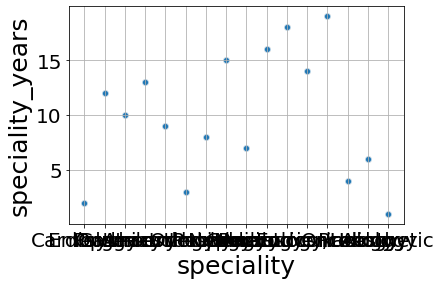

In [ ]:
%matplotlib inline
plt.grid()
#scatter plot to highlight the one to one correspondance between speciality years and speciality
sb.scatterplot(x='speciality', y='speciality_years', alpha=.3, data=dataframe)
plt.show()

In [ ]:
#pivot table
display(pd.pivot_table(dataframe,index=["speciality"],values=["speciality_years"]))

,speciality_years
speciality,
Aesthetic,1
Anaesthesiology,3
Cardiology,2
Emergency,12
Endocrinology,19
Gastroenterology,9
Gynecology/Urology,14
Nephrology,7
Neurosciences,18


In [ ]:
#dropping the column of the ategorical attribute speciality
dataframe.drop('speciality', axis=1, inplace=True)

In [ ]:
dataframe.head()

,age,speciality_years,wing,entry_level,occupation,intervention,ethnicity,sex,hours,country,target
0,34,2,W,minor-medium,ER doctors,Therapeutic,White,Male,44,Mexico,0
1,59,12,W,minor-medium,Therapist,Therapeutic,White,Male,55,United-States,1
2,64,10,S,medium-high,Patient,Other,Black,Male,44,United-States,0
3,61,12,W,minor-medium,Patient,Therapeutic,Black,Male,55,United-States,1
4,33,10,W,minor-medium,Surgeons,Therapeutic,White,Male,77,United-States,1


## Dataframe statistical description

In [ ]:
print('****** Statistical descritption ****** \n',dataframe.describe(), '\n')

****** Statistical descritption ****** 
                 age  speciality_years        hours        target
count  12800.000000      12800.000000  12800.00000  12800.000000
mean      43.109687         12.082187     46.00125      0.411094
std       14.015144          3.129214     13.06374      0.492051
min       18.000000          1.000000      1.00000      0.000000
25%       33.000000         10.000000     44.00000      0.000000
50%       42.000000         12.000000     44.00000      0.000000
75%       52.000000         15.000000     52.00000      1.000000
max       99.000000         19.000000    108.00000      1.000000 



## Target class count

In [ ]:
display(dataframe.groupby('target').size())

perc_zero=(dataframe.groupby('target').size()[0])/(dataframe.shape[0])*100
perc_ones=(dataframe.groupby('target').size()[1])/(dataframe.shape[0])*100
print('% of 0 :', perc_zero, '\n% of 1 : ', perc_ones)

target
0    7538
1    5262
dtype: int64

% of 0 : 58.890625 
% of 1 :  41.109375


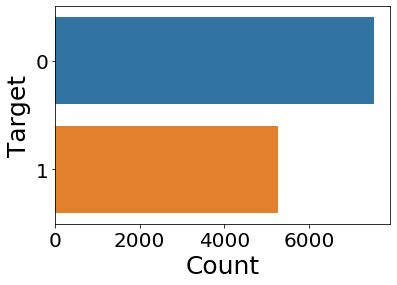

In [ ]:
#countplot with seaborn library of the total number of observation with target '1' and observation with target '0'
sb.countplot(y=dataframe.target ,data=dataframe)
plt.xlabel("Count")
plt.ylabel("Target")
plt.show()

## Indexing and division of dataframe

In [ ]:
#subdivision of the dataframe in explanatory variables and target classes
X=dataframe.iloc[:,:-1] #explanatory variables
y=dataframe.iloc[:,-1] #target classes

col=X.columns #columns indexes
row=X.index #row indexes

In [ ]:
display(X.head(),y)

,age,speciality_years,wing,entry_level,occupation,intervention,ethnicity,sex,hours,country
0,34,2,W,minor-medium,ER doctors,Therapeutic,White,Male,44,Mexico
1,59,12,W,minor-medium,Therapist,Therapeutic,White,Male,55,United-States
2,64,10,S,medium-high,Patient,Other,Black,Male,44,United-States
3,61,12,W,minor-medium,Patient,Therapeutic,Black,Male,55,United-States
4,33,10,W,minor-medium,Surgeons,Therapeutic,White,Male,77,United-States


0        0
1        1
2        0
3        1
4        1
        ..
12795    0
12796    1
12797    0
12798    0
12799    1
Name: target, Length: 12800, dtype: int64

## From categorical to numerical variables

In [ ]:
#overview of the different data types
X.dtypes

age                  int64
speciality_years     int64
wing                object
entry_level         object
occupation          object
intervention        object
ethnicity           object
 sex                object
hours                int64
country             object
dtype: object

In [ ]:
#highlight categorical and numerical data
categorical=X.select_dtypes(include=['object']).copy().columns #indexes of categorical values
print(categorical)

numerical=X.select_dtypes(include=['int64']).copy().columns #indexes of numerical values
print(numerical)

Index(['wing', 'entry_level', 'occupation', 'intervention', 'ethnicity',
       ' sex', 'country'],
      dtype='object')
Index(['age', 'speciality_years', 'hours'], dtype='object')


In [ ]:
#exploring categorical data
for c in categorical:
    display(pd.DataFrame(X[c].value_counts()).transpose())

,W,SW,S,SE,NW,N,NE
wing,9134,1126,892,600,576,466,6


,minor-medium,minor,high,medium,medium-high
entry_level,7162,3400,1617,320,301


,Patient,Dietitian,Therapist,Medical Assistants,Techs,Nurse,Surgeons,ER doctors,Lab,Physician,Gift Shop,Cafeteria,Delivery
occupation,3709,2030,1597,1417,1086,753,615,468,406,373,290,53,3


,Therapeutic,Other,Anesthesia,Diagnostic,Surgical,Propaedeutic
intervention,6236,2953,1440,1160,724,287


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
ethnicity,11150,1064,408,108,70


,Male,Female
sex,9134,3666


,United-States,Mexico,Philippines,Germany,India,Canada,Puerto-Rico,England,China,Japan,...,Ecuador,Thailand,Hungary,Trinadad&Tobago,France,Laos,Hong,Honduras,Outlying-US(Guam-USVI-etc),Scotland
country,11729,209,92,60,49,47,45,39,34,32,...,10,10,8,8,8,7,6,5,3,3


In [ ]:
'''
entry_level can be treated as an ordinal categorical variable with the method 'replace'
sex will be also encoded with the method 'replace' as Male=0, Female=1
other variables will be encoded using OneHotEncoder
'''

"\nentry_level can be treated as an ordinal categorical variable with the method 'replace'\nsex will be also encoded with the method 'replace' as Male=0, Female=1\nother variables will be encoded using OneHotEncoder\n"

In [ ]:
#encoding entry_level
X_numerical=X.copy()
replace_map_entrylvl = {'entry_level': {'minor': 1, 'minor-medium':2, 'medium':3, 'medium-high': 4, 'high': 5}}
X_numerical.replace(replace_map_entrylvl, inplace=True)
X_numerical.head()

,age,speciality_years,wing,entry_level,occupation,intervention,ethnicity,sex,hours,country
0,34,2,W,2,ER doctors,Therapeutic,White,Male,44,Mexico
1,59,12,W,2,Therapist,Therapeutic,White,Male,55,United-States
2,64,10,S,4,Patient,Other,Black,Male,44,United-States
3,61,12,W,2,Patient,Therapeutic,Black,Male,55,United-States
4,33,10,W,2,Surgeons,Therapeutic,White,Male,77,United-States


In [ ]:
numerical = numerical.append(pd.Index(['entry_level'])) #adding entry level to the numerical index
cat_list=categorical.drop(['entry_level']) #dropping entry level from categorical attributes index

In [ ]:
#encoding sex
replace_map_sex = {' sex': {' Male': 0, ' Female':1}}
X_numerical.replace(replace_map_sex, inplace=True)
X_numerical.head()

,age,speciality_years,wing,entry_level,occupation,intervention,ethnicity,sex,hours,country
0,34,2,W,2,ER doctors,Therapeutic,White,0,44,Mexico
1,59,12,W,2,Therapist,Therapeutic,White,0,55,United-States
2,64,10,S,4,Patient,Other,Black,0,44,United-States
3,61,12,W,2,Patient,Therapeutic,Black,0,55,United-States
4,33,10,W,2,Surgeons,Therapeutic,White,0,77,United-States


In [ ]:
#encoding other categorical variables
for cl in cat_list:
    dummy= pd.get_dummies(X_numerical[cl])
    X_numerical=pd.concat([X_numerical,dummy], axis = 1)
    X_numerical=X_numerical.drop(cl, axis=1)

In [ ]:
#looking at the new numerical dataset
display(X_numerical.head())
print(X_numerical.shape)

,age,speciality_years,entry_level,hours,N,NE,NW,S,SE,SW,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,34,2,2,44,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,59,12,2,55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,64,10,4,44,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,61,12,2,55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,33,10,2,77,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


(12800, 77)


# Data standardization

In [ ]:
#divisionof the dataset in numerical data and encoded categorical data in order to perform scaling 
X_to_scale=X_numerical[numerical].copy() #X_to_scale = dataframe of numerical data in need of scaling
display(X_to_scale.head())

,age,speciality_years,hours,entry_level
0,34,2,44,2
1,59,12,55,2
2,64,10,44,4
3,61,12,55,2
4,33,10,77,2


In [ ]:
#importing StandardScaler function
from sklearn.preprocessing import StandardScaler

#scaling X_to_scale and saving it as a new dataframe X_scaled
scaler = StandardScaler().fit(X_to_scale) #creating a scaler fitted to X_to_scale
scaled_X=pd.DataFrame(scaler.transform(X_to_scale)) #actual scaling
scaled_X.columns= X_to_scale.columns #renaming the columns of the new dataset
scaled_X.head()

,age,speciality_years,hours,entry_level
0,-0.650014,-3.222081,-0.153197,-0.152017
1,1.133840,-0.026266,0.688861,-0.152017
2,1.490611,-0.665429,-0.153197,1.487949
3,1.276549,-0.026266,0.688861,-0.152017
4,-0.721368,-0.665429,2.372978,-0.152017


In [ ]:
#merge the encoded categorical dataframe with the scaled numerical dataframe
X_cat=X_numerical.copy()
X_cat.drop(['age','speciality_years','hours', 'entry_level'], axis=1, inplace=True)
X_new= pd.concat([scaled_X, X_cat], axis=1)

In [ ]:
X_new.head()

,age,speciality_years,hours,entry_level,N,NE,NW,S,SE,SW,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,-0.650014,-3.222081,-0.153197,-0.152017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.133840,-0.026266,0.688861,-0.152017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.490611,-0.665429,-0.153197,1.487949,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.276549,-0.026266,0.688861,-0.152017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.721368,-0.665429,2.372978,-0.152017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Plotting numerical variables

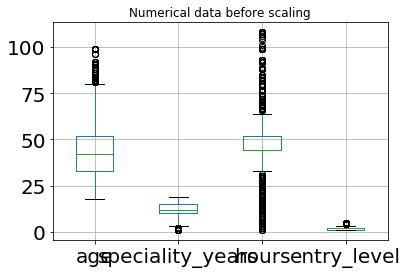

In [ ]:
#plot of numerical data before scaling
X_to_scale.boxplot()
plt.title('Numerical data before scaling')
plt.show()

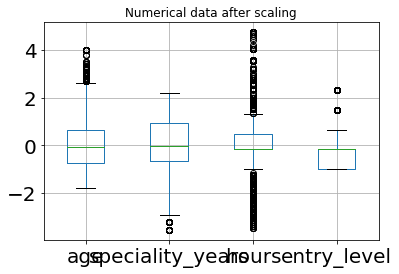

In [ ]:
#plot of numerical data after scaling
scaled_X.boxplot()
plt.title('Numerical data after scaling')
plt.show()

# Dataset division

In [ ]:
#importing train_test_split_function
from sklearn.model_selection import train_test_split

#Splitting data in train and test sets with a % of 70% and 30% respectively
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size =0.30, random_state=123) 

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8960, 77) (3840, 77)
(8960,) (3840,)


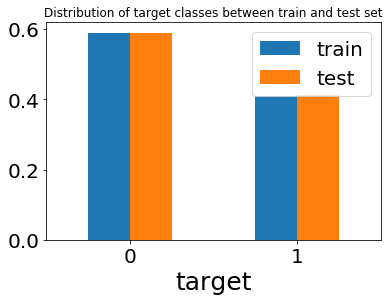

In [ ]:
#plotting the distribution of the target class between the train and test set to evaluate the 0 and 1 distribution
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the labels
plt.title('Distribution of target classes between train and test set')
plt.show()

# Classification

In [ ]:
#importing classifcation algorithms from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
  
#MLPerceptron
mlp=MLPClassifier()
    
#Logistic Regression 
log = LogisticRegression(solver='lbfgs', max_iter=300)

#KNearestNeighborsClassifier 
knn = KNeighborsClassifier()

#SVC
svm = SVC()

#GaussianNaiveBayes 
gauss = GaussianNB()

#DecisionTreeClassifier 
tree = DecisionTreeClassifier()

## Gridsearch to find the best parameters for each model

In [ ]:
#definition of a gridsearch function with X_train,y_train, classifier, parameters as inputs and the fitted gridsearchs
# asthe output
def gridsearch(X_train,y_train, classifier, parameters): 
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True) #score based on f1
    gs = gs.fit(X_train, y_train)
    
    #printing the best parameters and the best f1 score
    print('******GRIDSEARCH RESULTS******')
    print("Best score: %f with %s parameters" % (gs.best_score_, gs.best_params_))
    
    means = gs.cv_results_['mean_test_score'] #storing the mean of the test score 
    
    #plotting the mean of the test score
    plt.plot (means, color='red', alpha=1.00)
    plt.show()
    
    return gs #returns the fitted classifier - the best model will be gs.best_estimator_

#creating a dictionary to store the best f1 score of each method for comparison purpose
best_sc={}

## Logistic regression

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9

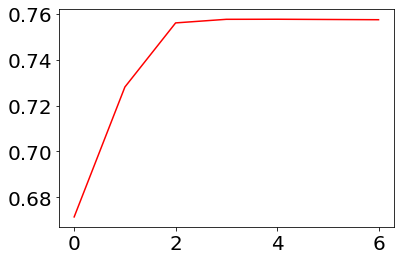

In [ ]:
#setting the logistic parameters
param_log={"C":[1e-3,1e-2,1e-1,1,10,100,1000], "max_iter":[500]}

gs_log = gridsearch(X_train,y_train, log, param_log) #using the gridsearch function
best_sc.update({'log':gs_log.best_score_,}) #updating best scores dictionary

y_pred_log=gs_log.best_estimator_.predict(X_test) #class prediction for the test set 

y_pred_train_log=gs_log.best_estimator_.predict(X_train) #class prediction for the train set 

In [ ]:
#importing metrics to evaluate the classifier
from sklearn import metrics

print('******RESULTS ON TEST SET******')
print("f1_score: ", metrics.f1_score(y_test, y_pred_log))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_log))
print("Recall: ", metrics.recall_score(y_test, y_pred_log), "\n")
print('******RESULTS ON TRAIN SET******')
print("f1_score: ", gs_log.best_score_)
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train_log))
print("Recall: ", metrics.recall_score(y_train, y_pred_train_log), "\n")

******RESULTS ON TEST SET******
f1_score:  0.7475758523615889
Accuracy:  0.78984375
Recall:  0.7548957675300063 

******RESULTS ON TRAIN SET******
f1_score:  0.7576189777243308
Accuracy:  0.80390625
Recall:  0.7684153302527861 



******LR CLASSIFICATION REPORT******
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2257
           1       0.74      0.75      0.75      1583

    accuracy                           0.79      3840
   macro avg       0.78      0.78      0.78      3840
weighted avg       0.79      0.79      0.79      3840

******LR CONFUSION MATRIX******
[[1838  419]
 [ 388 1195]]


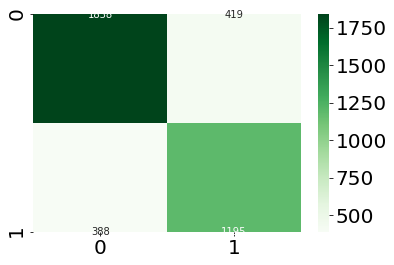

In [ ]:
#import classification report and confusion matrix to perform further classifier evaluation
from sklearn.metrics import classification_report
print('******LR CLASSIFICATION REPORT******')
print(classification_report(y_test, y_pred_log))

from sklearn.metrics import confusion_matrix
print('******LR CONFUSION MATRIX******')
print(confusion_matrix(y_test, y_pred_log))

#plot the confusion matrix
sb.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap="Greens", cbar=True);

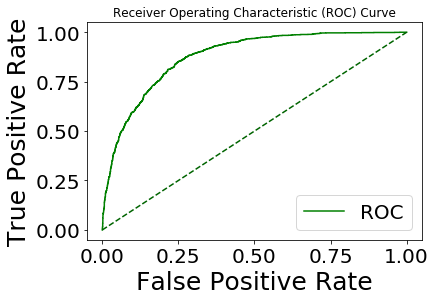

AUC: 0.88


In [ ]:
#plotting the ROC curve 
y_probs = gs_log.best_estimator_.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC', color='green')
plt.plot([0, 1], [0, 1], color='darkgreen', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1]) #area under ROC curve
print('AUC: %.2f' % auc)

## Support Vector Machine

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   4

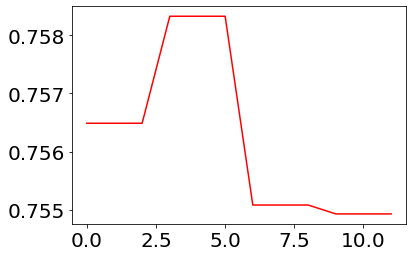

In [ ]:
param_svm={"kernel":['linear'], "C":[0.01,0.1,1,10],"gamma":[1e-5,1e-4,1]} #parameters

gs_svm = gridsearch(X_train,y_train, svm, param_svm) #GS function
best_sc.update({'svm':gs_svm.best_score_}) #updating best score dict
y_pred_svm=gs_svm.best_estimator_.predict(X_test) #prediction on test

y_pred_train_svm=gs_svm.best_estimator_.predict(X_train) #prediction on train

In [ ]:
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_svm))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_svm))
print("Recall: ", metrics.recall_score(y_test, y_pred_svm), "\n")
print('******RESULTS ON TRAIN SET******')
print("f1_score: ", gs_svm.best_score_)
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train_svm))
print("Recall: ", metrics.recall_score(y_train, y_pred_train_svm), "\n")

***RESULTS ON TEST SET***
f1_score:  0.7476350320415014
Accuracy:  0.7846354166666667
Recall:  0.7738471257106759 

******RESULTS ON TRAIN SET******
f1_score:  0.7583257626855895
Accuracy:  0.7935267857142857
Recall:  0.7879858657243817 



******SVM CLASSIFICATION REPORT******
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2257
           1       0.72      0.77      0.75      1583

    accuracy                           0.78      3840
   macro avg       0.78      0.78      0.78      3840
weighted avg       0.79      0.78      0.79      3840

******SVM CONFUSION MATRIX******
[[1788  469]
 [ 358 1225]]


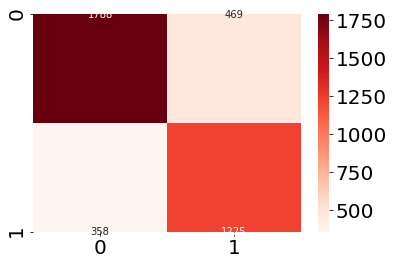

In [ ]:
#classification report
print('******SVM CLASSIFICATION REPORT******')
print(classification_report(y_test, y_pred_svm))

#confusion matrix
print('******SVM CONFUSION MATRIX******')
print(confusion_matrix(y_test, y_pred_svm))

#plotting confusion matrix
sb.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap="Reds", cbar=True);

## KNN

Fitting 3 folds for each of 99 candidates, totalling 297 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   

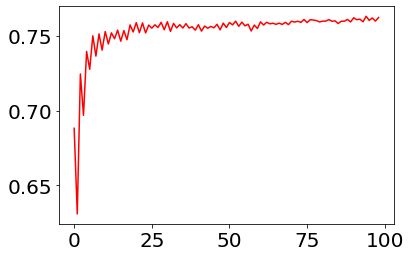

In [ ]:
param_knn={'n_neighbors':np.array(range(1,100))} #parameters

gs_knn = gridsearch(X_train,y_train, knn, param_knn) #GS function
best_sc.update({'knn':gs_knn.best_score_}) #updating best score dict
y_pred_knn=gs_knn.best_estimator_.predict(X_test) #prediction on test

y_pred_train_knn=gs_knn.best_estimator_.predict(X_train) #prediction on train

In [ ]:
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_knn))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_log))
print("Recall: ", metrics.recall_score(y_test, y_pred_knn), "\n")
print('******RESULTS ON TRAIN SET******')
print("f1_score: ", gs_knn.best_score_)
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train_knn))
print("Recall: ", metrics.recall_score(y_train, y_pred_train_knn), "\n")

***RESULTS ON TEST SET***
f1_score:  0.7531531531531531
Accuracy:  0.78984375
Recall:  0.7921667719519899 

******RESULTS ON TRAIN SET******
f1_score:  0.7633215769984445
Accuracy:  0.79453125
Recall:  0.8162544169611308 



******KNN CLASSIFICATION REPORT******
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2257
           1       0.72      0.79      0.75      1583

    accuracy                           0.79      3840
   macro avg       0.78      0.79      0.78      3840
weighted avg       0.79      0.79      0.79      3840

******KNN CONFUSION MATRIX******
[[1764  493]
 [ 329 1254]]


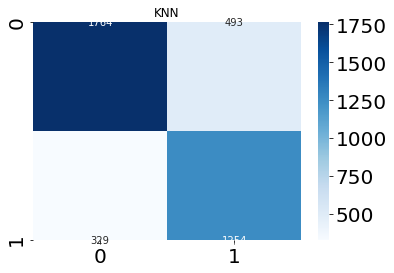

In [ ]:
print('******KNN CLASSIFICATION REPORT******')
print(classification_report(y_test, y_pred_knn))

print('******KNN CONFUSION MATRIX******')
print(confusion_matrix(y_test, y_pred_knn))

sb.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap="Blues", cbar=True)
plt.title('KNN')
plt.show()

******KNN ROC******


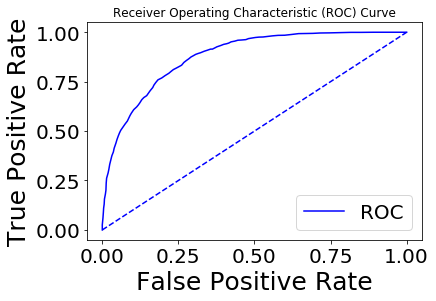

AUC: 0.88


In [ ]:
y_probs = gs_knn.best_estimator_.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])
print('******KNN ROC******')
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC', color='blue')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Decision tree

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    

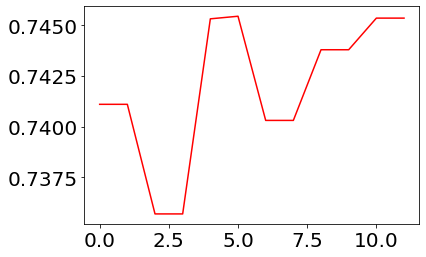

In [ ]:
param_tree={'criterion': ['entropy','gini'], #parameters
              'max_depth': [3,4,5],
              'min_samples_split': [5,10],
              'min_samples_leaf': [2]}

gs_tree = gridsearch(X_train,y_train, tree, param_tree) #GS function
best_sc.update({'tree':gs_tree.best_score_}) #updating best score dict
y_pred_tree=gs_tree.best_estimator_.predict(X_test) #prediction on test

y_pred_train_tree=gs_tree.best_estimator_.predict(X_train) #prediction on train

In [ ]:
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_tree))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_tree))
print("Recall: ", metrics.recall_score(y_test, y_pred_tree), "\n")
print('******RESULTS ON TRAIN SET******')
print("f1_score: ", gs_tree.best_score_)
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train_tree))
print("Recall: ", metrics.recall_score(y_train, y_pred_train_tree), "\n")

***RESULTS ON TEST SET***
f1_score:  0.758494031221304
Accuracy:  0.79453125
Recall:  0.7826910928616551 

******RESULTS ON TRAIN SET******
f1_score:  0.7454516159705221
Accuracy:  0.7933035714285714
Recall:  0.7798314759445502 



******DECISION TREE CLASSIFICATION REPORT******
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2257
           1       0.74      0.78      0.76      1583

    accuracy                           0.79      3840
   macro avg       0.79      0.79      0.79      3840
weighted avg       0.80      0.79      0.80      3840

******DECISION TREE CONFUSION MATRIX******
[[1812  445]
 [ 344 1239]]


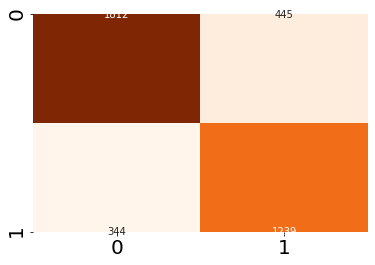

In [ ]:
print('******DECISION TREE CLASSIFICATION REPORT******')
print(classification_report(y_test, y_pred_tree))

print('******DECISION TREE CONFUSION MATRIX******')
print(confusion_matrix(y_test, y_pred_tree))

sb.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap="Oranges", cbar=False);

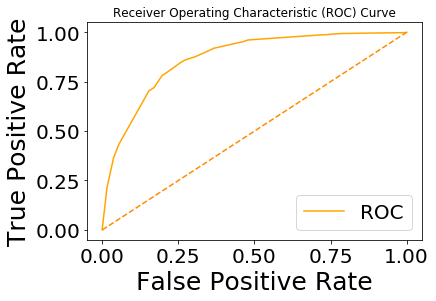

AUC: 0.87


In [ ]:
y_probs = gs_tree.best_estimator_.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC', color='orange')
plt.plot([0, 1], [0, 1], color='darkorange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## ML Perceptron

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   57

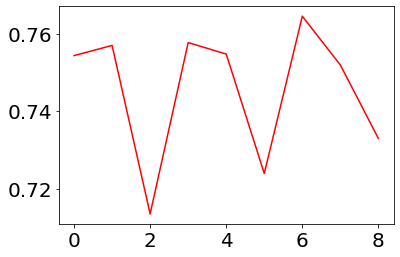

In [ ]:
param_mlp={"hidden_layer_sizes":[(5, 2),(10,8,5),(100,20)],  "max_iter": [300], "alpha": [0.00001,0.001,0.1]} #parameters

gs_mlp = gridsearch(X_train,y_train, mlp, param_mlp) #GS function
best_sc.update({'mlp':gs_mlp.best_score_}) #updating best score dict
y_pred_mlp=gs_mlp.best_estimator_.predict(X_test) #prediction on test

y_pred_train_mlp=gs_mlp.best_estimator_.predict(X_train) #prediction on train

In [ ]:
print('***MLP RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_mlp))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_mlp))
print("Recall: ", metrics.recall_score(y_test, y_pred_mlp), "\n")
print('******MLP RESULTS ON TRAIN SET******')
print("f1_score: ", gs_mlp.best_score_)
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train_mlp))
print("Recall: ", metrics.recall_score(y_train, y_pred_train_mlp), "\n")

***MLP RESULTS ON TEST SET***
f1_score:  0.763430725730443
Accuracy:  0.80390625
Recall:  0.7675300063171194 

******MLP RESULTS ON TRAIN SET******
f1_score:  0.7644535857256605
Accuracy:  0.8106026785714285
Recall:  0.7741234030986681 



******MLP CLASSIFICATION REPORT******
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2257
           1       0.76      0.77      0.76      1583

    accuracy                           0.80      3840
   macro avg       0.80      0.80      0.80      3840
weighted avg       0.80      0.80      0.80      3840

******MLP CONFUSION MATRIX******
[[1872  385]
 [ 368 1215]]


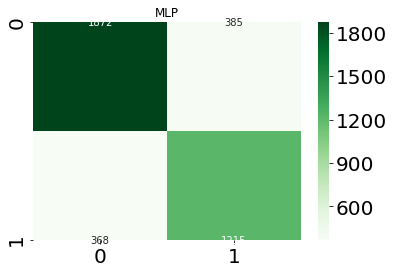

In [ ]:
print('******MLP CLASSIFICATION REPORT******')
print(classification_report(y_test, y_pred_mlp))

print('******MLP CONFUSION MATRIX******')
print(confusion_matrix(y_test, y_pred_mlp))

sb.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap="Greens", cbar=True)
plt.title('MLP')
plt.show()

******MLP ROC******


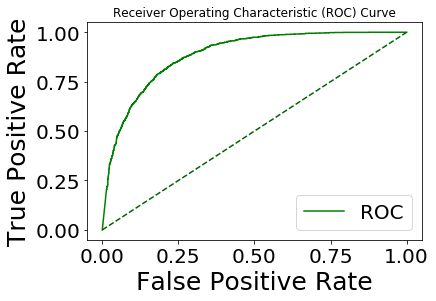

AUC: 0.89


In [ ]:
y_probs = gs_mlp.best_estimator_.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])
print('******MLP ROC******')
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC', color='green')
plt.plot([0, 1], [0, 1], color='darkgreen', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Naive Bayes

In [ ]:
gauss.fit(X_train, y_train) #fitting gauss
y_pred_gauss=gauss.predict(X_test) #prediction
best_sc.update({'nvb': metrics.f1_score(y_test, y_pred_mlp)})
y_pred_train_gauss=gauss.predict(X_train) #prediction on train

print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_mlp))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_gauss))
print("Recall: ", metrics.recall_score(y_test, y_pred_gauss), "\n")
print('******RESULTS ON TRAIN SET******')
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train_gauss))
print("Recall: ", metrics.recall_score(y_train, y_pred_train_gauss), "\n")

***RESULTS ON TEST SET***
f1_score:  0.763430725730443
Accuracy:  0.5317708333333333
Recall:  0.967150979153506 

******RESULTS ON TRAIN SET******
Accuracy:  0.5357142857142857
Recall:  0.972546887741234 



******NVB CLASSIFICATION REPORT******
              precision    recall  f1-score   support

           0       0.91      0.23      0.36      2257
           1       0.47      0.97      0.63      1583

    accuracy                           0.53      3840
   macro avg       0.69      0.60      0.50      3840
weighted avg       0.73      0.53      0.47      3840

******NVB CONFUSION MATRIX******
[[ 511 1746]
 [  52 1531]]


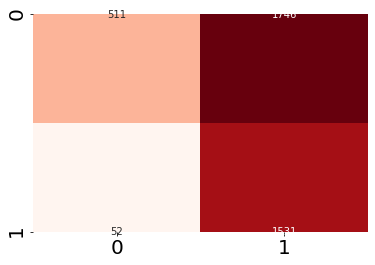

In [ ]:
print('******NVB CLASSIFICATION REPORT******')
print(classification_report(y_test, y_pred_gauss))

print('******NVB CONFUSION MATRIX******')
print(confusion_matrix(y_test, y_pred_gauss))

sb.heatmap(confusion_matrix(y_test, y_pred_gauss), annot=True, fmt='d', cmap="Reds", cbar=False);

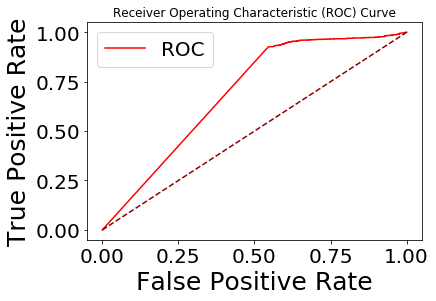

AUC: 0.69


In [ ]:
y_probs = gauss.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC', color='red')
plt.plot([0, 1], [0, 1], color='darkred', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [ ]:
#best scoring all together
print('******BEST F1 SCORE FOR EACH ALGORITHM******')
display(best_sc)

******BEST F1 SCORE FOR EACH ALGORITHM******


{'log': 0.7576189777243308,
 'svm': 0.7583257626855895,
 'knn': 0.7633215769984445,
 'tree': 0.7454516159705221,
 'mlp': 0.7644535857256605,
 'nvb': 0.763430725730443}

## Best Model Selection

In [ ]:
k_neighbors=gs_knn.best_params_['n_neighbors']
knn_model = gs_knn.best_estimator_ #creation of the best model

In [ ]:
#y_prediction=knn_model.predict(X_to_test) --> ready to use for classification o a new set of observations